# Practical ML Final Project - The Spotify Challenge



<img src="https://cdn.dribbble.com/users/2284480/screenshots/15988331/media/9335cd177db6913a8059ffc9d0c20e11.gif" alt="image description" width="300" height="200" >


## Background:
You have been hired as a senior data analyst by a music streaming platform. The company wants to deeply understand its data by building machine learning models. Your conclusions will lead to its recommendation system.

Your conclusions may lead to an improvement in the company's recommendation system and a significant revenue increase.


## In This Project, You Will: <br>

> ##### 1. Perform **Exploratory Data Analysis and Preprocessing** using encoding methods, descriptive statistics, and visualizations.<br>
> ##### 2. Carry out a **Statistical Hypothesis Test** to determine the fate of disputes in the company.<br>
> ##### 3. **Feature Engineering and Selection**<br>
> ##### 4. **Build a Song Popularity Prediction Model** choosing the best-performing model from Linear Regression, RandomForrestRegressor, and XGBRegressor, and performing hyperparameter tuning.<br>
> ##### 5. **Build a Song Genre Classifier Model** choosing the best-performing model from Logistic Regression, RandomForrestClassifier, and XGBClassifier, and performing hyperparameter tuning.<br>
> ##### 6. **Cluster and Profile** the Songs Data using the K-Means Algorithm.


## Dataset Metadata:

>**Target Columns** you will predict in this project:
- `popularity` (Ranges from 0 to 100), float.
- `genre` is the genre of the song. String type, multiclass.<br>


>**Numerical Columns**:
- `id` (Id of a track generated by Spotify)
- `acousticness` (Ranges from 0 to 1)
- `danceability` (Ranges from 0 to 1)
- `energy` (Ranges from 0 to 1)
- `duration_ms` (Integer typically ranging from 200k to 300k)
- `instrumentalness` (Ranges from 0 to 1)
- `valence` (Ranges from 0 to 1)
- `animality` (Ranges from 0 to 1)
- `tempo` (Float typically ranging from 50 to 150)
- `liveness` (Ranges from 0 to 1)
- `loudness` (Float typically ranging from -60 to 0)
- `speechiness` (Ranges from 0 to 1)


> **Categorical Columns** (string types):
- `mode` (Minor = 0, Major = 1)
- `explicit` 'Whether the song is explicit (contains swearing or inappropriate language).'
- `key` (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1, and so on…)
- `artists` (List of artists mentioned)
- `release_date` (Date of release mostly in yyyy-mm-dd format, however, the precision of date may vary)
- `track_name` (Name of the song)
- `time_signature` A notational convention to specify how many beats are in each bar (or measure). For example, rock music often has a time signature of 4/4, while classical music often has a time signature of 3/4 or 4/4.


## Deliverables:
1. A well-documented Jupyter Notebook or Python script containing all the code, analysis, and visualizations.
2. A final report summarizing the project, including the methodology, key findings, limitations, and recommendations for the music streaming platform.
3. Python Model Files
<!-- - Presentation slides summarizing the project's main points and findings for presentation to stakeholders. לא דחוף -->




## Tips:
- Remember to describe your methodology, findings, limitations, and suggestions for future improvement in the text.
- Consult with ChatGPT, classmates, and course staff once you are stuck on one question for more than 1 hour (preferably in that order).

<br>

**Good Luck, and Have Fun!**


Practical ML Course Staff
<br>

---




# 1. Data Exploration and Preprocessing:



a) Load the data set from the given [url](https://github.com/AvivGelfand/DataPool/blob/main/README.md). You can use schema modifications if you know how to.


In [11]:
# # Connect google drive:
# from google.colab import drive
# # Mount Google Drive
# drive.mount('/content/drive/')

Course_folder = ""

aviv_url = "G:\My Drive\Work\Machine Learning Modules\Final Project\datasets\\tracks.csv"
aviv_url_raw = "G:\My Drive\Work\Machine Learning Modules\Final Project\datasets\\tracks_raw.csv"
aviv_url_raw2 = "C:\\Users\\avivg\\ML Scripts\\FinalProject\\raw_tracks.csv"

aviv_driveurl = "/content/drive/MyDrive/tracks.csv"

import pandas as pd

def load_df(url):
    return pd.read_csv(url, sep=",", encoding="utf-8", 
                       dtype={"name": str, "artists": str, 
                            #   "danceability": "float16", "energy": "float16", "popularity": "int16", "speechiness": "float16", 
                            # #   "acousticness": "float16", 
                            #   "instrumentalness": "float32", "liveness": "float16", "valence": "float16", "loudness": "float16", "tempo": "float16", "events": "int16", "animal_sounds": "int16", "animality": "float16"
                              }
                                        )

df = load_df(aviv_url_raw2)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607782 entries, 0 to 607781
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                607782 non-null  object 
 1   track_name        607711 non-null  object 
 2   popularity        607782 non-null  int64  
 3   duration_ms       607782 non-null  int64  
 4   explicit          607782 non-null  object 
 5   artists           607782 non-null  object 
 6   id_artists        607782 non-null  object 
 7   release_date      607782 non-null  object 
 8   danceability      607782 non-null  float64
 9   energy            607782 non-null  float64
 10  key               607782 non-null  object 
 11  loudness          607782 non-null  float64
 12  mode              607782 non-null  object 
 13  speechiness       607782 non-null  float64
 14  acousticness      607782 non-null  float64
 15  instrumentalness  607782 non-null  float64
 16  liveness          60

,id,track_name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,events,animal_sounds,animality
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,No explicit content,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,0.674,0.7440,0.151,0.127,104.90,3/4,NaN,1,1,0.991578
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,No explicit content,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,0.797,0.0000,0.148,0.655,102.00,1/4,NaN,0,1,0.085009
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,No explicit content,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,0.994,0.0218,0.212,0.457,130.40,5/4,NaN,0,1,0.456856
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,No explicit content,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,0.995,0.9180,0.104,0.397,170.00,3/4,NaN,1,1,0.234018
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,No explicit content,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.989,0.1300,0.311,0.196,103.25,4/4,NaN,1,1,0.525168



b) Identify and distinguish between categorical and numerical columns.


In [12]:
import numpy as np
categorical_features = df.select_dtypes(include=["object"]).columns.values
categorical_features = np.concatenate([categorical_features, ["time_signature", "animal_sounds"]])

numerical_features = df.select_dtypes(include=["int16", "int32", "int64", "float16", "float32", "float64"]).columns.values
numerical_features = np.setdiff1d(numerical_features, categorical_features)

print("Categorical Features:\n", categorical_features)
print("\nNumerical Features: \n", numerical_features)

Categorical Features:
 ['id' 'track_name' 'explicit' 'artists' 'id_artists' 'release_date' 'key'
 'mode' 'time_signature' 'genre' 'time_signature' 'animal_sounds']

Numerical Features: 
 ['acousticness' 'animality' 'danceability' 'duration_ms' 'energy' 'events'
 'instrumentalness' 'liveness' 'loudness' 'popularity' 'speechiness'
 'tempo' 'valence']



c) Visualize descriptive statistics to gain insights into column distributions, central tendency, and variability.

<img src="https://github.com/AvivGelfand/DataPool/blob/main/Screenshot%202023-06-17%20215354.jpg?raw=true" alt="image description" width="300" height="175">


In [13]:
# # on google colab:
# !rm -rf DataScienceHelperFuncs 
# on windows:
!rmdir /s /q DataScienceHelperFuncs 

!git clone https://github.com/AvivGelfand/DataScienceHelperFuncs.git
import DataScienceHelperFuncs.helpers as helpers

Cloning into 'DataScienceHelperFuncs'...


In [14]:
features_dis = ['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'popularity', 'speechiness']
# helpers.show_distributions(df[features_dis])

d) Plot the visualize the distribution of categorical features.

In [15]:
df["genre"] = df["genre"].replace(
        {
        # "Movie": "Soundtrack","Anime": "Soundtrack",
        "Children’s Music": "Children's Music",
        # "World": "Other","Opera": "Other","Comedy": "Other","Folk": "Country"
        }
    )

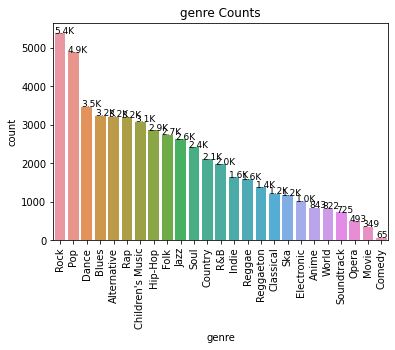

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def sorted_count_plot(df, col):
    ax = sns.countplot(x=col, data=df, order=df[col].value_counts().index);
    plt.title(f"{col} Counts");
    for p in ax.patches:
        if p.get_height() > 1000:
            ax.annotate(f"\n{round(p.get_height()/1000,1)}K",(p.get_x() , p.get_height() + 1),size=9);
        else:
            ax.annotate(f"\n{int(p.get_height())}",(p.get_x() , p.get_height() + 1),size=9);
    # if there are more than 10 categories, rotate the labels:
    if len(df[col].unique()) > 12:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
    
    plt.show();

# helpers.sorted_count_plot(df, "genre")
sorted_count_plot(df, "genre")


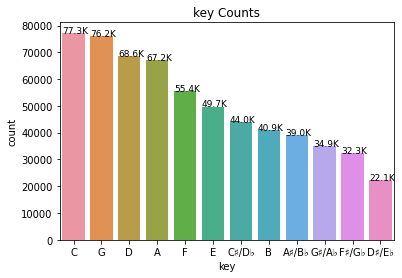

In [18]:
sorted_count_plot(df, "key")

e) Explore relationships between features and target variables using appropriate plots.<br> **Include a KDE plot of `popularity` with a hue of `explicit`**.

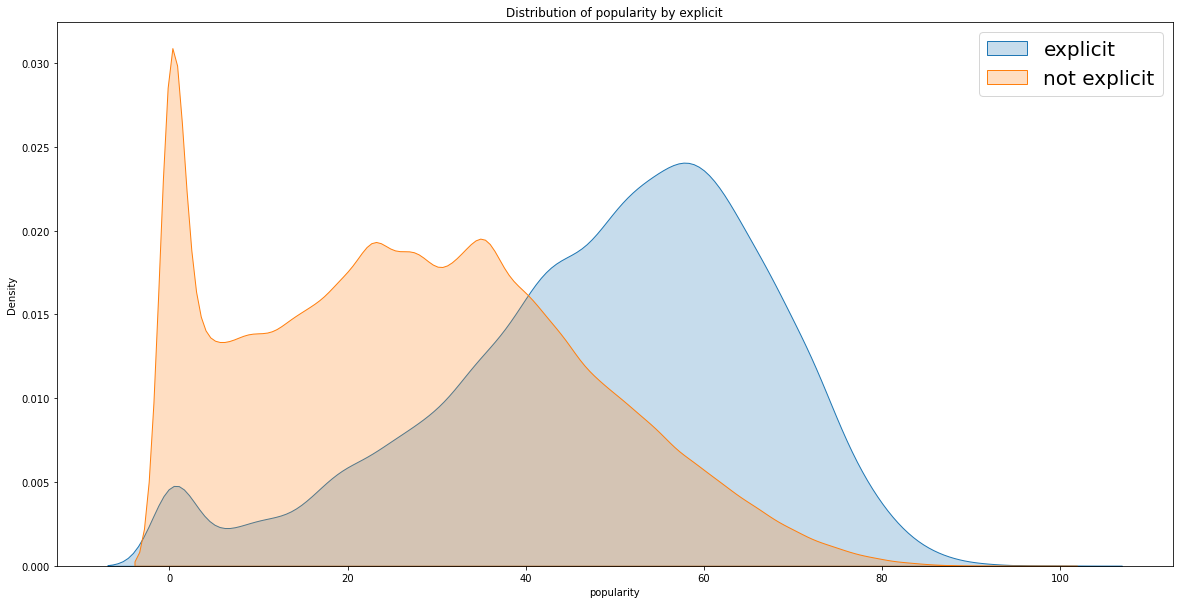

In [19]:
# replace explicit values with 0 and 1
df["explicit_enc"] = df["explicit"].replace({"No explicit content": 0, "has explicit content": 1})

# kde plot of the distribution of popularity by explicit
plt.figure(figsize=(20, 10))
sns.kdeplot(df.loc[df["explicit_enc"] == 1, "popularity"],fill=True,label="explicit")
sns.kdeplot(df.loc[df["explicit_enc"] == 0, "popularity"],fill=True,label="not explicit")
labels = ["explicit", "not explicit"]
plt.legend(labels)
# set legend size
plt.legend(prop={"size": 20})
plt.title("Distribution of popularity by explicit")
plt.show()

<AxesSubplot:xlabel='genre'>

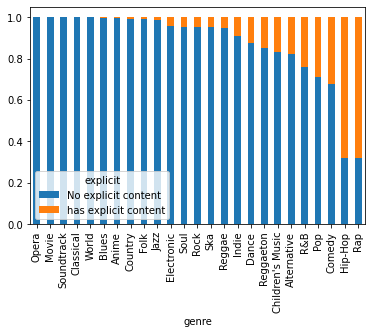

In [20]:
pd.crosstab(df["genre"], df["explicit"], normalize="index").sort_values(by="has explicit content", ascending=True).plot.bar(stacked=True)

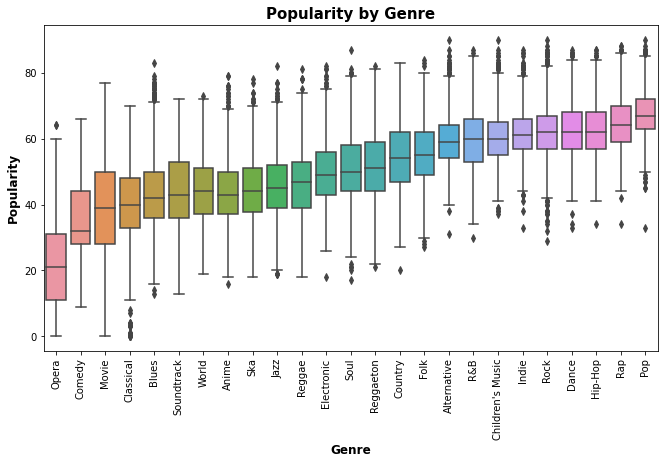

In [21]:
relevant_features = ["popularity","acousticness", "danceability", "energy", "liveness", "loudness", "speechiness", "valence" ]
# Iterate over each column
# for column in relevant_features:
    # Calculate the mean popularity for each genre and sort the genres
mean_popularity = df.groupby("genre")['popularity'].mean()
sorted_genres = mean_popularity.sort_values().index

# Create boxplot using sns
plt.figure(figsize=(11, 6))
ax = sns.boxplot(x=df["genre"], y=df['popularity'], order=sorted_genres)
plt.title(f"Popularity by Genre", fontsize=15, fontweight="bold");
plt.xlabel("Genre", fontsize=12, fontweight="bold");
plt.ylabel('popularity'.capitalize(), fontsize=12, fontweight="bold");
# Rotate x labels
plt.xticks(rotation=90);
plt.show();

# 2. Statistical Tests:



> ### a) T-test of independence: <BR>
>A fierce disagreement has erupted between the CTO and the Chief of Marketing CMO. The battleground revolves around the influence of explicitness on the popularity of songs. The CTO argues that explicit songs tend to generate higher levels of popularity due to their provocative nature, while the CMO maintains that explicit content may hinder mainstream appeal. As a statistical hotshot, you have been called upon to provide a statistical examination to shed light on this captivating dispute.




>> 1) Stating the Hypothesis: <br>
>>> Hypothesis Question:<br> Is there a `significant difference in popularity` between `explicit and non-explicit` songs?<br> <br>
>>> Null Hypothesis $H_0:$ `There is no` significant difference in popularity between explicit and non-explicit songs. <br><br>
>>> Alternative Hypothesis $H_1:$ `There is a  ignificant difference in popularity between explicit and non-explicit songs`.


>> 2) Perform the appropriate statistical test and print out the test statistic and its $P_{value}$. <br>

In [22]:
import scipy.stats as stats

# alternative options :
# * 'less'      => one-sided, a is expected to be greater than b
# * 'greater'   => one-sided, a is expected to be lesser than b
# * 'two-sided' => two-sided (default)
res_t = stats.ttest_ind(a=df.loc[df["explicit"] == 'has explicit content', "popularity"],
    b=df.loc[df["explicit"] == 'No explicit content', "popularity"],
    alternative="two-sided",
)
print("Results:\nT Statistic:",round(res_t[0], 5),"\nP-Value:",round(res_t[1], 5))

Results:
T Statistic: 193.51949 
P-Value: 0.0


>> 3) Conclusion:
We can `reject` $H_0$, meaning explicit songs tend to generate  different levels of popularity, with a significance level of $100$%.


> ### b) Chi-Square test of independence:<br>
>Over the last week, there has been an ongoing discussion and difference of opinion regarding the **impact of explicit content on different music _genres_**. Some board members argue that explicit content is more prevalent in specific genres, while others believe there is no significant association between explicit content and genre.<br>
To address this dispute and arrive at an evidence-based conclusion, both sides agreed on entrusting you with conducting a proper statistical test to examine the relationship between the dataset's `explicit` and `genre` features.
<br><br>


>> 1) Stating the Hypothesis  <br>
>>> Hypothesis Question: Is there a `Significant difference in explicit and non-explicit songs` between `different genre types`? <br> <br>
>>> Null Hypothesis $H_0:$ `There is no significant difference` in the proportion of explicit and non-explicit songs. <br> <br>
>>> Alternative Hypothesis $H_1:$ ``There is significant difference in the proportion of explicit and non-explicit songs`.


>> 2) Perform the appropriate statistical test. Print out the test statistic and its $P_{value}$.

In [23]:
from scipy.stats import chi2_contingency
# Create a contingency table of 'genre' and 'explicit'
contingency_table = pd.crosstab(df['genre'], df['explicit'])

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 16450.79154921377
P-value: 0.0


>> 3) Conclustion: <br>
We can `reject ` $H_{0}$ ,
 meaning explicit songs are more likely to be is seen among some genres than others, with the significance level of `100`$ \%$.

# 3. Feature Engineering and Selection:
<img src="https://github.com/AvivGelfand/DataPool/blob/main/27422asda.jpg?raw=true" alt="image description" width="700" height="150">



In [24]:
# keep only the rows where genre is not null
df_clf = df.copy().dropna(subset=["genre"])


a) Encode columns that require it using an appropriate encoder.

In [25]:
from sklearn.preprocessing import OrdinalEncoder

# Define the categories for encoding
key_categories = ["C", "C♯/D♭", "D", "D♯/E♭", "E", "F", "F♯/G♭", "G", "G♯/A♭", "A", "A♯/B♭", "B"]
time_signature_categories = ["other", "1/4", "3/4", "4/4", "5/4"]
mode_categories = ["Minor", "Major"]
explicit_categories = ["No explicit content", "has explicit content"]

# Create an instance of OrdinalEncoder with the defined categories
enc = OrdinalEncoder(categories=[key_categories, time_signature_categories, mode_categories,explicit_categories])

# Specify the columns to encode
columns_to_encode = ["key", "time_signature", "mode", "explicit"]

# Encode the specified columns in the DataFrame
df[columns_to_encode] = enc.fit_transform(df[columns_to_encode])
enc = OrdinalEncoder(categories=[key_categories, time_signature_categories, mode_categories,explicit_categories])

df_clf[columns_to_encode] = enc.fit_transform(df_clf[columns_to_encode])

b) Select methods for handling missing values, one for the classification problem and another for the regression problem.

> Answer: We already defined df_clf in the previous task, so we treated the missing values in the genre column for the classification task.

> We have missing values in the danceability column, it has

In [26]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with a median filling strategy
imp = SimpleImputer(missing_values=np.nan, strategy='median')

# Fill missing values of the specified columns
df[["danceability"]] = imp.fit_transform(df[["danceability"]])
df_clf[["danceability"]] = imp.transform(df_clf[["danceability"]])


c) Identify relevant features that may be significant to each one of the tasks based on your domain knowledge and statistical analysis (ANOVA).



In [27]:
"""
 feature selection for regression task
"""


# Set significance level
alpha = 0.01
df_anova = pd.DataFrame({"F-statistic": [], "p-value": [], "Indicative": []})
redundant_cols = []

# Loop through each numeric column and calculate ANOVA results
for col in np.intersect1d(numerical_features, df.drop('popularity',axis=1).columns):
    # Calculate F-statistic and p-value using calc_anova function
    F, p_value = helpers.calc_anova(df, "popularity",col)
    # Store ANOVA results in the df_anova dataframe
    df_anova.loc[col, :] = [round(F, 3),round(p_value, 3),
    "Yes" if p_value < alpha else "No"]
    # If the p-value is greater than the significance level, add the column to the redundant_cols list
    if p_value > alpha:
        redundant_cols.append(col)

# print("redundant_cols: ", redundant_cols)
df.drop(redundant_cols, axis=1, inplace=True)
print("removed redundant columns: ", redundant_cols)
# Sort the df_anova dataframe by the "Indicative" column
df_anova.sort_values("F-statistic", ascending=False)

removed redundant columns:  ['animality', 'events']


,F-statistic,p-value,Indicative
acousticness,1214.155,0.000,Yes
loudness,809.328,0.000,Yes
energy,733.129,0.000,Yes
instrumentalness,614.406,0.000,Yes
danceability,227.555,0.000,Yes
speechiness,120.063,0.000,Yes
tempo,40.480,0.000,Yes
valence,37.558,0.000,Yes
liveness,32.556,0.000,Yes
duration_ms,21.105,0.000,Yes


In [28]:
"""
 feature selection for classification task
"""

# Set significance level
alpha = 0.01
# Create a dataframe to store ANOVA results for each numeric column
df_anova_clf = pd.DataFrame({"F-statistic": [], "p-value": [], "Indicative": []})

# Create a list to store redundant columns (i.e. those that are not significant)
redundant_cols = []

# Loop through each numeric column and calculate ANOVA results
#  loop for each column in the intersection of numerical_features and dfc.columns
for col in np.intersect1d(numerical_features, df_clf.columns):
    # Calculate F-statistic and p-value using calc_anova function
    F, p_value = helpers.calc_anova(df_clf,"genre",col,)

    # Store ANOVA results in the df_anova dataframe
    df_anova_clf.loc[col, :] = [round(F, 3),round(p_value, 3),"Yes" if (p_value < alpha) | (F > 2.5) else "No"]

    # If the p-value is greater than the significance level, add the column to the redundant_cols list
    if (p_value > alpha) | (F < 2.5):
        redundant_cols.append(col)

# Sort the df_anova dataframe by the "Indicative" column
# print("redundant_cols: ", redundant_cols)
for col in np.intersect1d(redundant_cols, df_clf.columns):
    df_clf.drop(col, axis=1, inplace=True)
print("removed redundant columns: ", redundant_cols)
df_anova_clf.sort_values("F-statistic", ascending=True)

removed redundant columns:  ['animality', 'events']


,F-statistic,p-value,Indicative
events,0.952,0.529,No
animality,1.791,0.010,No
liveness,40.924,0.000,Yes
tempo,57.599,0.000,Yes
duration_ms,147.720,0.000,Yes
valence,386.100,0.000,Yes
speechiness,652.868,0.000,Yes
energy,977.350,0.000,Yes
danceability,977.646,0.000,Yes
acousticness,1107.144,0.000,Yes


d) Perform feature engineering if necessary, such as creating new features by transforming existing ones.

For example:<br>
- Examine the `release_date` feature. Can we make a `release_year` feature out of it and check if it's correlated with our `Popularity` value?
- Can the decade be used as a helpful
feature in the model? Create a `decade` and show a suitable graph.
- Feel free to make more if you wish.

In [29]:
# creating a release year column
df["release_year"] = pd.to_datetime(df["release_date"]).dt.year.astype("int64")

df[['release_year','popularity']].corr() # indeed highly correlated

,release_year,popularity
release_year,1.000000,0.589803
popularity,0.589803,1.000000


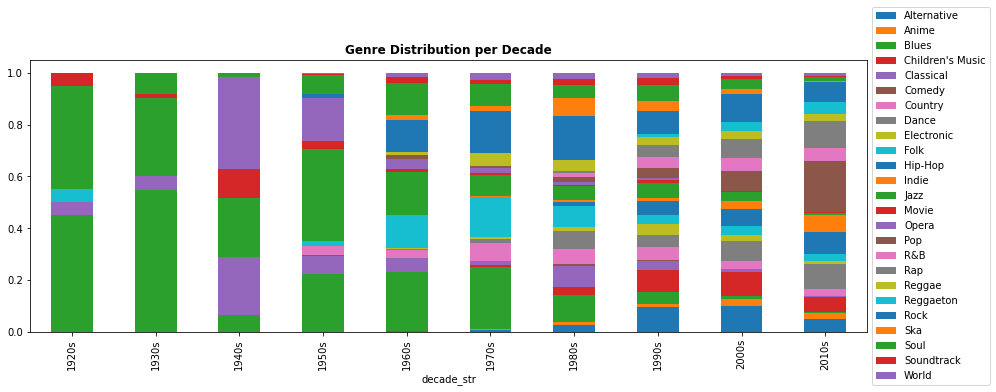

In [30]:
import matplotlib.pyplot as plt
# creating decade columns
df_clf["decade_num"] = df["release_year"].apply(lambda x: int(int(x)/10)*10)
df_clf["decade_str"] = df_clf["decade_num"].astype("str") + "s"

# plotting distributions of genres per decade
cross_tab = pd.crosstab(df_clf["decade_str"], df_clf["genre"], normalize="index")
cross_tab.plot.bar(stacked=True, figsize=(15, 5));
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5));
plt.title("Genre Distribution per Decade", fontweight="bold");

# 4. Building A Regression Model:
In this section, you will apply the following regression models: Linear regression, random forest, and gradient boosting for predicting the song's popularity.`

<img src="https://github.com/AvivGelfand/DataPool/blob/main/HvGpE.jpg?raw=true" alt="image description" width="350" height="250">

a) Split the dataset into training and testing sets. 
- If you think the data needs scaling, preform the scaling and provide an appropriate explanation for it.

In [31]:
latest = df[df["release_year"] > 2019]

# - Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

to_drop = ['id',"artists", "track_name", "explicit", "release_date", "genre",'id_artists','explicit_enc','animal_sounds']

df_samp = latest

X_samp = df_samp.copy().drop("popularity", axis=1).drop(to_drop, axis=1, inplace=False)
y_samp = df_samp["popularity"]

X_samp_train, X_samp_test, y_samp_train, y_samp_test = train_test_split(X_samp, y_samp, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_samp_train_scaled = scaler.fit_transform(X_samp_train.copy())
X_samp_test_scaled = scaler.transform(X_samp_test.copy())


y_samp_train = y_samp_train.values.reshape(-1,1)
y_samp_test = y_samp_test.values.reshape(-1,1)


b) Think of a good baseline to compare the performance of the models you built to it.<br>
For example, a relatively simple baseline can be a degenerate model of the mean of popularity and its RMSE metric.<bR> A more complex baseline could be the average of the popularity for the particular year in which the song was released.

In [32]:
# define a dataframe to store models and their rmse scores
models_scores = pd.DataFrame({"model": [], "parameters": [], "rmse": []})
models_scores

# select the mean as a baseline model
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

# Create a dummy regressor
dummy = DummyRegressor(strategy="mean")

# "Train" dummy regressor
dummy.fit(X_samp_train, y_samp_train)

# Get predictions
dummy_preds = dummy.predict(X_samp_test)
print("dummy_pred for all rows: ", dummy_preds[0])
# Calculate RMSE
dummy_rmse = mean_squared_error(y_samp_test, dummy_preds, squared=False)
print("dummy_rmse: ", dummy_rmse)
# Add dummy regressor results to the models_scores dataframe using concat
models_scores = pd.concat([models_scores, pd.DataFrame({"model": ["dummy"], "parameters": ["none"], "rmse": [round(dummy_rmse,3)]})])

models_scores

dummy_pred for all rows:  41.67206627921355
dummy_rmse:  25.321846863685423


,model,parameters,rmse
0,dummy,none,25.322


In [33]:
# create a baseline model for regression using groupby year and mean

# Create a baseline model
baseline = latest.groupby("release_year")["popularity"].mean().reset_index()
print("baseline: \n", baseline.head())

# Merge baseline with X_train and X_test
X_samp_train_baseline = X_samp_train.merge(baseline, how="left", on="release_year")
X_samp_test_baseline = X_samp_test.merge(baseline, how="left", on="release_year")

# Calculate RMSE
baseline_rmse = mean_squared_error(y_samp_test, X_samp_test_baseline["popularity"], squared=False)

print("baseline_rmse: ", baseline_rmse)
# Add baseline model results to the models_scores dataframe using concat
models_scores = pd.concat([models_scores, pd.DataFrame({"model": ["baseline"], "parameters": ["none"], "rmse": [round(baseline_rmse,3)]})])

models_scores # indeed the complex baseline model is better than the dummy model


baseline: 
    release_year  popularity
0          2020   44.686948
1          2021   35.191848
baseline_rmse:  24.98371593858209


,model,parameters,rmse
0,dummy,none,25.322
0,baseline,none,24.984


### Linear Regression
c) Train the model and Hyper-tune it on the training set and evaluate its performance using root mean squared error as the evaluation metric.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_samp_train_scaled, y_samp_train)

# Make predictions on the scaled test set
predictions = model.predict(X_samp_test_scaled)

# Evaluate the model
rmse = round(mean_squared_error( y_samp_test, predictions, squared=False), 2)
print(f"Mean Squared Error: {rmse}")

# Create a DataFrame for the current model results
model_results_df = pd.DataFrame({
    "model": [type(model).__name__],
    "parameters": [model.get_params()],
    "rmse": [rmse],
})

# Concatenate the model results to the main DataFrame
models_scores = pd.concat([models_scores, model_results_df], ignore_index=True)


pd.set_option("display.max_colwidth", None)
models_scores


Mean Squared Error: 21.99


,model,parameters,rmse
0,dummy,none,25.322
1,baseline,none,24.984
2,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}",21.990


### Random Forest Regressor
d) Train the model and Hyper-tune it on the training set and evaluate its performance using root mean squared error as the evaluation metric.

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Define the scoring metric you want to optimize (e.g., mean squared error)
scoring = make_scorer(mean_squared_error)

# Create the Random Forest Regression model
rfr_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune

param_grid = {
    #for faster runs, use less values for the parameters
    # "n_estimators": [100, 200],
    "n_estimators": [100],
    # "max_depth": [None, 5, 10],
    "max_depth": [None],
    # "min_samples_split": [2,5,10]
    "min_samples_split": [2]
    }

# Perform grid search cross-validation
grid_search = GridSearchCV(rfr_model, param_grid, cv=3, n_jobs=-1, verbose=3, scoring=scoring)
grid_search.fit(X_samp_train, y_samp_train)

# Get the best model and its hyperparameters
rfr_best_model = grid_search.best_estimator_

# Make predictions on the scaled test set
rfr_predictions = rfr_best_model.predict(X_samp_test)

# Evaluate the model
rfr_rmse = round(mean_squared_error(y_samp_test, rfr_predictions, squared=False), 3)
print(f"RandomForestRegressor Mean Squared Error: {rfr_rmse}")

# Create a DataFrame for the current model results
model_results_df = pd.DataFrame({"model": [type(rfr_model).__name__],"parameters": [rfr_best_model.get_params()],"rmse": [rfr_rmse]
})


# Concatenate the model results to the main DataFrame
models_scores = pd.concat([models_scores, model_results_df], ignore_index=True)


pd.set_option("display.max_colwidth", None)
models_scores


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\avivg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestRegressor Mean Squared Error: 17.409


,model,parameters,rmse
0,dummy,none,25.322
1,baseline,none,24.984
2,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}",21.990
3,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}",17.409


### XGBoost Regressor
e) Train the model and Hyper-tune it on the training set and evaluate its performance using root mean squared error as the evaluation metric.

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV



# Create the Gradient Boosting Regression model
model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameters to tune

param_grid = {
    #for faster runs, use less values for the parameters
    "n_estimators": [100,200],
    "n_estimators": [100],
    # "learning_rate": [0.01, 0.1],
    "learning_rate": [0.1],
    # "max_depth": [3, 5, 7]
    "max_depth": [5]
    }

# Perform grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1,verbose=3, scoring=scoring)

grid_search.fit(X_samp_train, y_samp_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the scaled test set
predictions = best_model.predict(X_samp_test)

# Evaluate the model
rmse = round(mean_squared_error(y_samp_test, predictions, squared=False), 2)
print(f"Mean Squared Error: {rmse}")

# Create a DataFrame for the current model results
model_results_df = pd.DataFrame({"model": [type(model).__name__],"parameters": [best_model.get_params()],"rmse": [rmse]})

# Concatenate the model results to the main DataFrame
models_scores = pd.concat([models_scores, model_results_df], ignore_index=True)
models_scores


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\avivg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 18.66


,model,parameters,rmse
0,dummy,none,25.322
1,baseline,none,24.984
2,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}",21.990
3,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}",17.409
4,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}",18.660


f) Select the best-performing model.
Interpret its results and discuss the key factors influencing song popularity based on the model's feature importance.

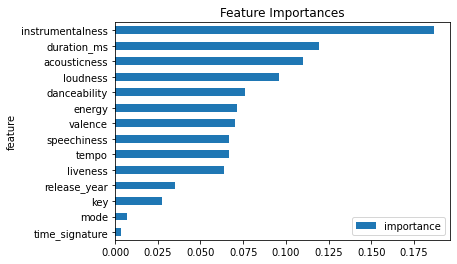

In [37]:
# rfr_best_model is the the best model
# interpert the model
# get the feature importance
# rfr_best_model.feature_importances_

# Create a DataFrame of feature importances
feature_importances_df = pd.DataFrame({
    "feature": X_samp_train.columns,
    "importance": rfr_best_model.feature_importances_
}).sort_values("importance", ascending=True)

# Display the first 10 most important features


# Plot the feature importances
feature_importances_df.plot(x="feature", y="importance", kind="barh");
plt.title("Feature Importances");
plt.show();


g) Apply the final trained model to predict song popularity for new, unseen data.


In [38]:

df_new=pd.read_csv("C:\\Users\\avivg\\ML Scripts\\FinalProject\\spotify2022-2023.csv").rename(columns={"name":"track_name"})
df_new

# encode the categorical columns with the same encoder we used for the original data
df_new[columns_to_encode] = enc.fit_transform(df_new[columns_to_encode])

df_new_X = df_new.drop(columns=["popularity"])
# drop every column in df_new_X that is in to_drop list, if exists
df_new_X = df_new_X.drop(columns=to_drop, errors="ignore")
df_new_X = df_new_X[X_samp.columns]
# # print(df_new_X.columns.values)
# # print(X_samp.columns.values)
# # print(X_samp.columns.values == df_new_X.columns.values)

df_new_y = df_new["popularity"]
# df_new_X = scaler.transform(df_new_X.copy())
# # X_samp_test.columns
# # check model performance on the new data
# df_new_X
preds_new = rfr_best_model.predict(df_new_X)
preds_new

# rmse
rmse_new = round(mean_squared_error(df_new_y, preds_new, squared=False), 2)
print(f"Mean Squared Error: {rmse_new}")

Mean Squared Error: 41.66



h) BONUS: Discuss the practical implications of the model and provide recommendations to the music streaming platform based on the model's insights.



# 5. Building A Classification Model:
In this section, you will apply the following regression models: Linear regression, random forest, and gradient boosting for classifying song `genre`.

<img src="https://github.com/AvivGelfand/DataPool/blob/main/multiclass.png?raw=true" alt="image description" width="500" height="250">





a) Split the dataset into training and testing sets.



In [39]:
# recall that df_clf is already created and contains the original data

from sklearn.model_selection import train_test_split

to_drop = ["track_name", "artists", "release_date",'id','release_year','id_artists','explicit','decade','decade_str']

# Select features and target variable
features = df_clf.copy().drop(columns=["genre"] + to_drop, errors="ignore")
target = df_clf.copy()["genre"]

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)

In [41]:
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [42]:
# define a dataframe to store models and their rmse scores
models_scores = pd.DataFrame({"model": [], "parameters": [], "accuracy": []})
models_scores

,model,parameters,accuracy


b) Think of a good baseline for predicting the target variable, in order to compare the performance of the models you built to it.<br>
For example, a relatively simple baseline can be a degenerate model of the most common genre. <br>
A more complex baseline can be the most common genre for the particular year in which the song is predicted.

In [43]:
# selecting a simple baseline model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(X_train, y_train)
dummy_preds = dummy_clf.predict(X_test)

accuracy = round(accuracy_score(y_test, dummy_preds),3)
print(f"Accuracy: {accuracy}")

# concatenate the model results to the main DataFrame
model_results_df = pd.DataFrame({"model": [type(dummy_clf).__name__],"parameters": [dummy_clf.get_params()],"accuracy": [accuracy]})

model_results_df

Accuracy: 0.103


,model,parameters,accuracy
0,DummyClassifier,"{'constant': None, 'random_state': None, 'strategy': 'most_frequent'}",0.103


### Logistic Regression
c) Train the model and Hyper-tune it on the training set and evaluate its performance using root mean squared error as the evaluation metric.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Standardize the feature values
scaler_clf = StandardScaler()
X_train_scaled = scaler_clf.fit_transform(X_train.copy())
X_test_scaled = scaler_clf.transform(X_test.copy())

In [45]:
# Train a logistic regression classifier
lrc = LogisticRegression(max_iter=1000)
lrc.fit(X_train_scaled, y_train)

# Predict on the test set
lrc_y_pred = lrc.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
lrc_accuracy = accuracy_score(y_test, lrc_y_pred)
print("Accuracy:", lrc_accuracy)

# Store the model and its accuracy score in the models_scores dataframe
models_scores = pd.concat([models_scores,pd.DataFrame({"model": ["LogisticRegression"],"parameters": ["default"],"accuracy": [lrc_accuracy]}),])

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, lrc_y_pred))
models_scores

Accuracy: 0.30874082546945003
              precision    recall  f1-score   support

           0       0.23      0.20      0.21       612
           1       0.39      0.47      0.43       159
           2       0.36      0.55      0.44       621
           3       0.08      0.02      0.03       604
           4       0.56      0.55      0.55       244
           5       0.75      0.30      0.43        10
           6       0.29      0.24      0.26       398
           7       0.22      0.16      0.19       739
           8       0.44      0.35      0.39       217
           9       0.22      0.16      0.19       535
          10       0.32      0.31      0.31       610
          11       0.19      0.13      0.16       315
          12       0.36      0.34      0.35       518
          13       0.36      0.21      0.26        63
          14       0.67      0.71      0.69       105
          15       0.28      0.44      0.34       946
          16       0.16      0.06      0.09       4

,model,parameters,accuracy
0,LogisticRegression,default,0.308741


### Random Forest Classifaier
d) Train the model and Hyper-tune it on the training set and evaluate its performance using root mean squared error as the evaluation metric.

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    #for faster runs, use less values for the parameters
    # "max_depth": [5, 20],
    "max_depth": [5],
    # "min_samples_split": [8, 10, 12],
    "min_samples_split": [ 12],
    # "n_estimators": [100, 200]
    "n_estimators": [100]
    }

# Create a RandomForestClassifier
rfc = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Perform predictions on the test set
rfc_y_pred = grid_search.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
rfc_accuracy = accuracy_score(y_test, rfc_y_pred)
print("Accuracy:", rfc_accuracy)

# Store the model and its accuracy score in the models_scores dataframe
models_scores = pd.concat([models_scores, pd.DataFrame({"model": ["RandomForestClassifier"], "parameters": [grid_search.best_params_], "accuracy": [rfc_accuracy]})])

# Print the classification report
print(classification_report(y_test, rfc_y_pred))
models_scores

Fitting 2 folds for each of 1 candidates, totalling 2 fits


Accuracy: 0.26899246973596413
              precision    recall  f1-score   support

           0       0.23      0.14      0.17       612
           1       0.50      0.35      0.41       159
           2       0.25      0.67      0.37       621
           3       0.00      0.00      0.00       604
           4       0.49      0.59      0.54       244
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00       398
           7       0.21      0.03      0.05       739
           8       0.55      0.05      0.09       217
           9       0.41      0.02      0.04       535
          10       0.35      0.24      0.29       610
          11       0.00      0.00      0.00       315
          12       0.29      0.26      0.27       518
          13       0.00      0.00      0.00        63
          14       0.80      0.66      0.72       105
          15       0.22      0.53      0.31       946
          16       0.00      0.00      0.00       4

c:\Users\avivg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\avivg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\avivg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

,model,parameters,accuracy
0,LogisticRegression,default,0.308741
0,RandomForestClassifier,"{'max_depth': 5, 'min_samples_split': 12, 'n_estimators': 100}",0.268992


### XGBoost Classifaier
e) Train the model and Hyper-tune it on the training set and evaluate its performance using root mean squared error as the evaluation metric.


In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search


param_grid = {
    #for faster runs, use less values for the parameters
    # "max_depth": [5, 10, 20],
    "max_depth": [5, 20],
    # "min_child_weight": [1, 3, 5],
    # "min_child_weight": [1, 5],
    "min_child_weight": [1],
    # "n_estimators": [100, 200]
    "n_estimators": [100]
    }

# Create a based model
xgb = XGBClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

grid_search.best_params_

# Predict on the test set
xgb_y_pred = grid_search.predict(X_test_scaled)

# Evaluate the accuracy of the classifier

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print("Accuracy:", xgb_accuracy)

# Store the model and its accuracy score in the models_scores dataframe
models_scores = pd.concat([models_scores,pd.DataFrame({"model": ["XGBClassifier"],"parameters": [grid_search.best_params_],"accuracy": [xgb_accuracy]})])
print(classification_report(y_test, xgb_y_pred))
models_scores                                         

ModuleNotFoundError: No module named 'xgboost'


f) Select the best-performing model.
Interpret its results and discuss the key factors indicating the genre of a song based on the model's feature importance.


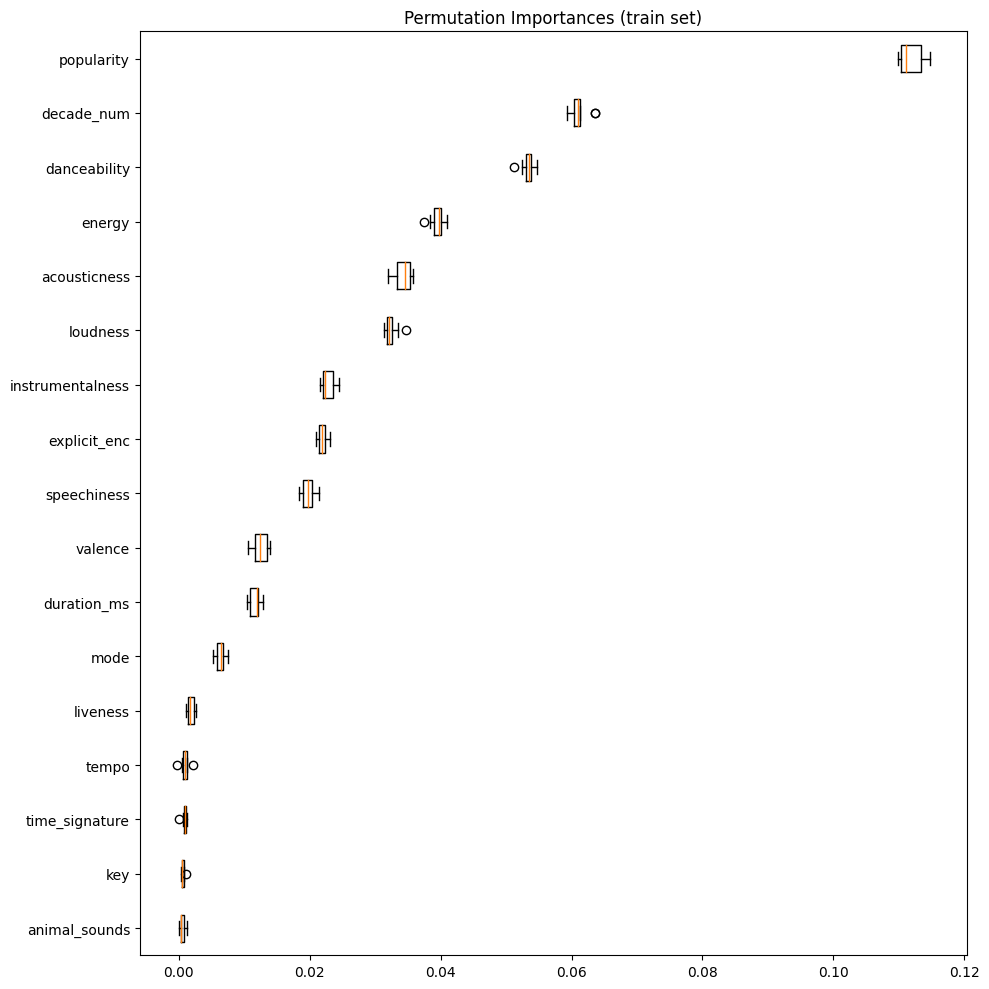

In [ ]:
# interpret the logistic regression model
from sklearn.inspection import permutation_importance

# Compute permutation feature importances
result = permutation_importance(lrc, X_train_scaled, y_train, n_repeats=10, random_state=42, n_jobs=-1)

# Sort the features based on their importance scores

sorted_idx = result.importances_mean.argsort()

# Create a barplot of the feature importances

fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()


g) Apply the final trained model to predict song genre for new, unseen data.

In [ ]:
# need to find relevant data for this part


h) BONUS: Discuss the practical implications of the model and provide recommendations to the music streaming platform based on the model's insights.


# 6. Clustering & Profiling
<img src="https://github.com/AvivGelfand/DataPool/blob/main/Clustring%20images.jpeg?raw=true" alt="image description" width="400" height="200">


a) Segment the songs in the data into clusters<br>
 Hint: Use the elbow method to find the optimal parameters for your clusters.

In [ ]:
to_drop_2 = ["id", "release_date", "track_name", "artists", "mode","id_artists",'genre']
df_clust = df.drop(to_drop_2, axis=1)
df_clust.head(2)

# set golbal k value
k_num = 3

In [ ]:
df_clust.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'animal_sounds',
       'explicit_enc', 'release_year'],
      dtype='object')

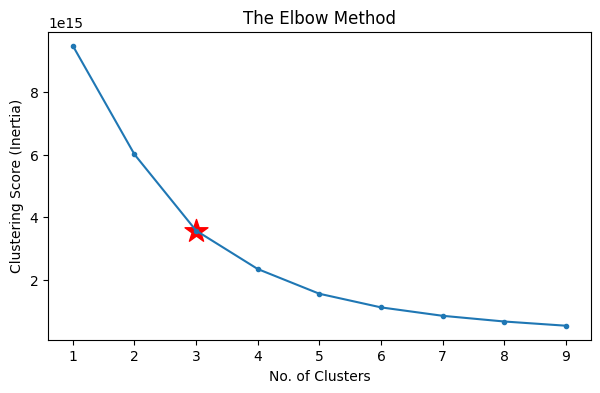

In [ ]:
helpers.elbow_method(data_set=df_clust, k=k_num,iters_num=10)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k_num,n_init='auto',random_state=42)
kmeans.fit(df_clust)
df_clust['cluster']=kmeans.labels_
df_clust['cluster'].value_counts()


1    460097
0    146116
2      1569
Name: cluster, dtype: int64


b) Analyze the characteristics of the resulting segments, using box-plots and other visualization techniques.


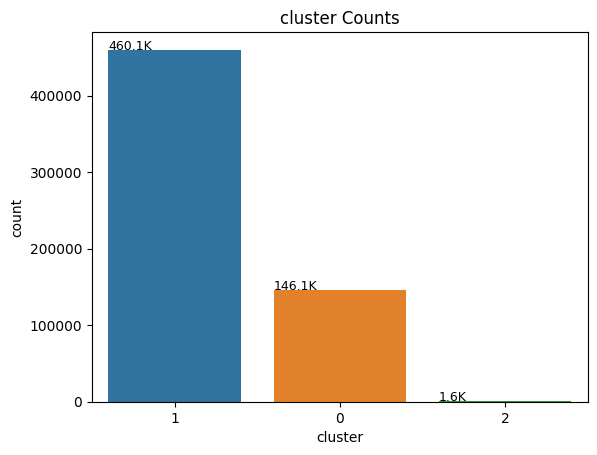

In [ ]:
# plot countplot for each cluster

sorted_count_plot(df_clust, 'cluster')


-----

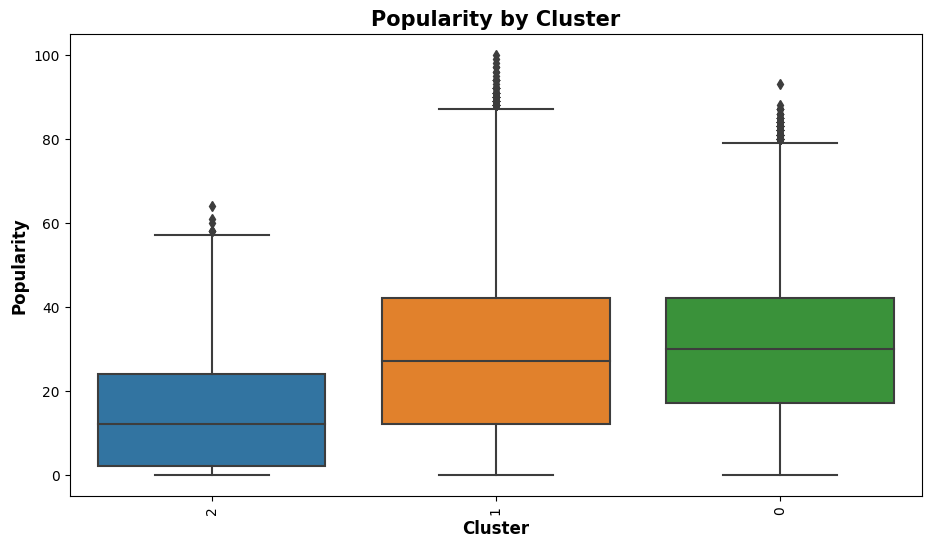

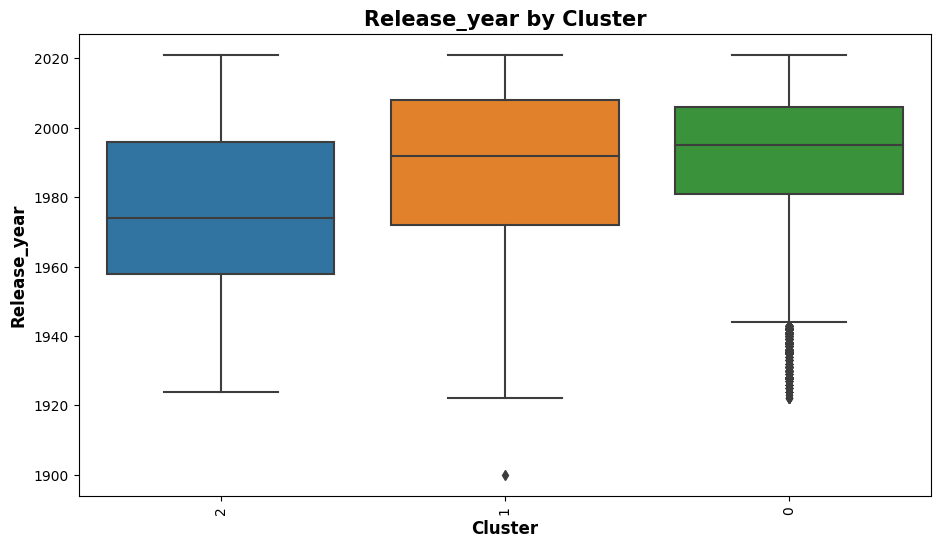

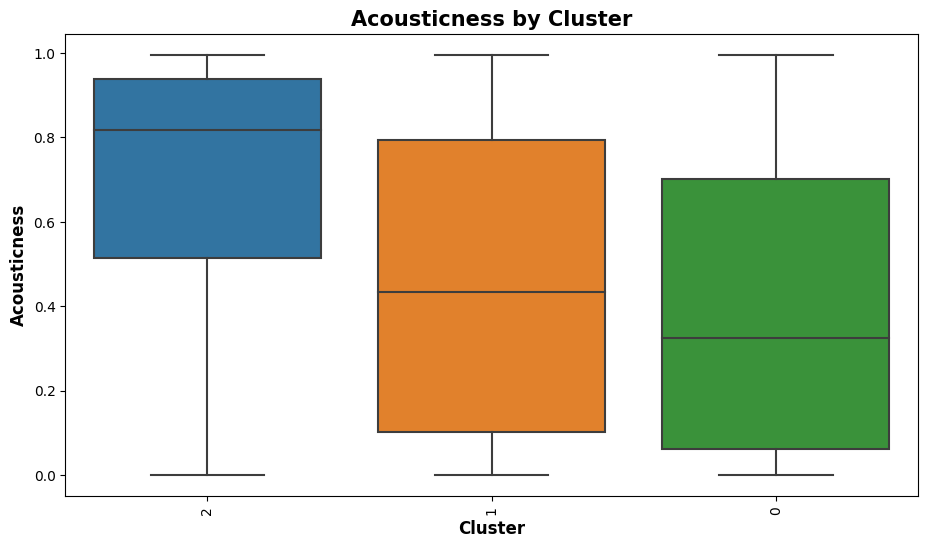

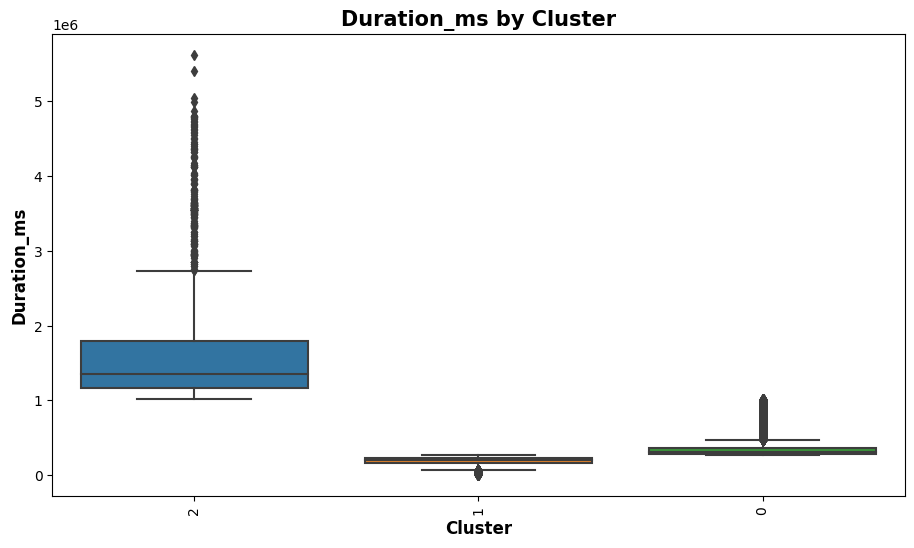

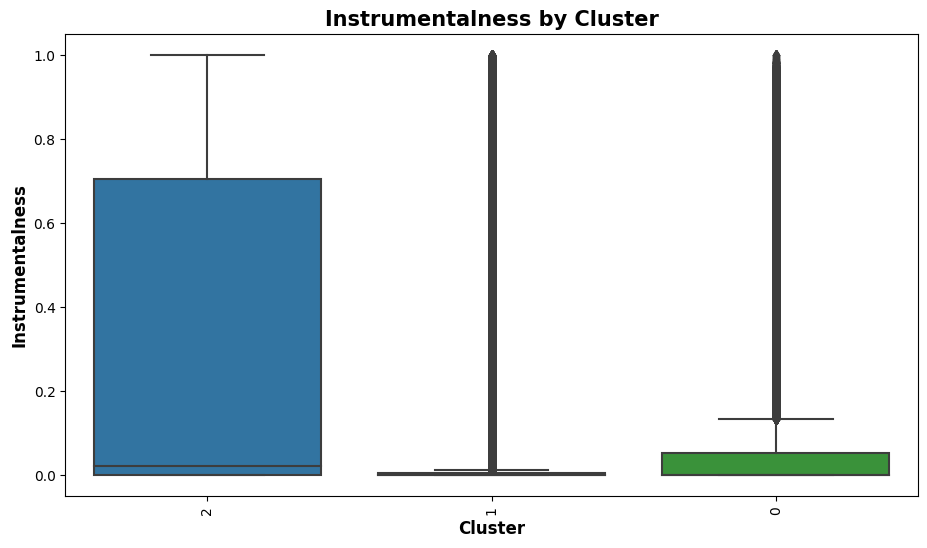

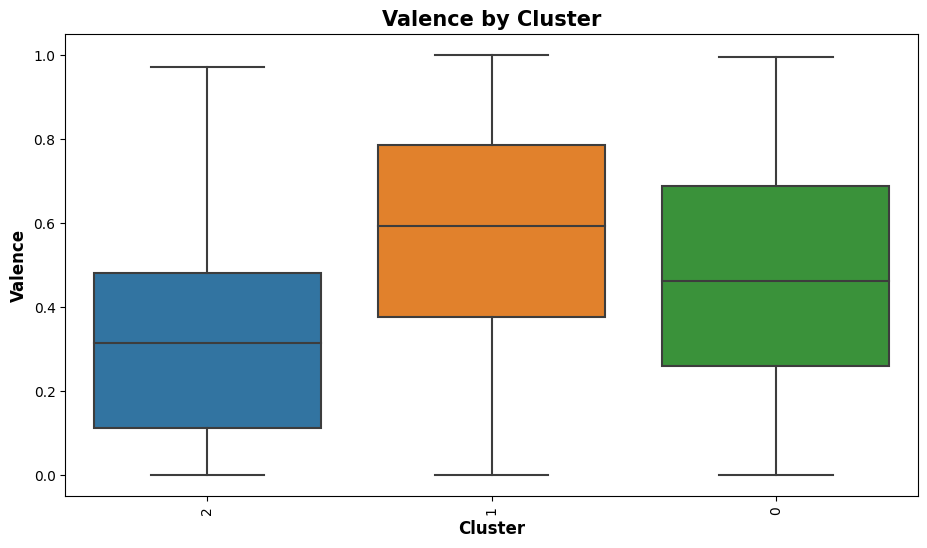

In [ ]:
relevant_features = ["popularity", 'release_year',"acousticness",   'duration_ms','instrumentalness', "valence" 
                     #"danceability",# "liveness",  "energy",#   "loudness","speechiness",
                            ]

# Iterate over each column
for column in relevant_features:
    # Create boxplot using sns
    ax = sns.boxplot(x=df_clust["cluster"], y=df_clust[column], order=sorted_genres)
    plt.title(f"{column.capitalize()} by Cluster", fontsize=15, fontweight="bold");
    plt.xlabel("Cluster", fontsize=12, fontweight="bold");
    plt.ylabel(column.capitalize(), fontsize=12, fontweight="bold");
    # Rotate x labels
    plt.xticks(rotation=90);
    plt.show();

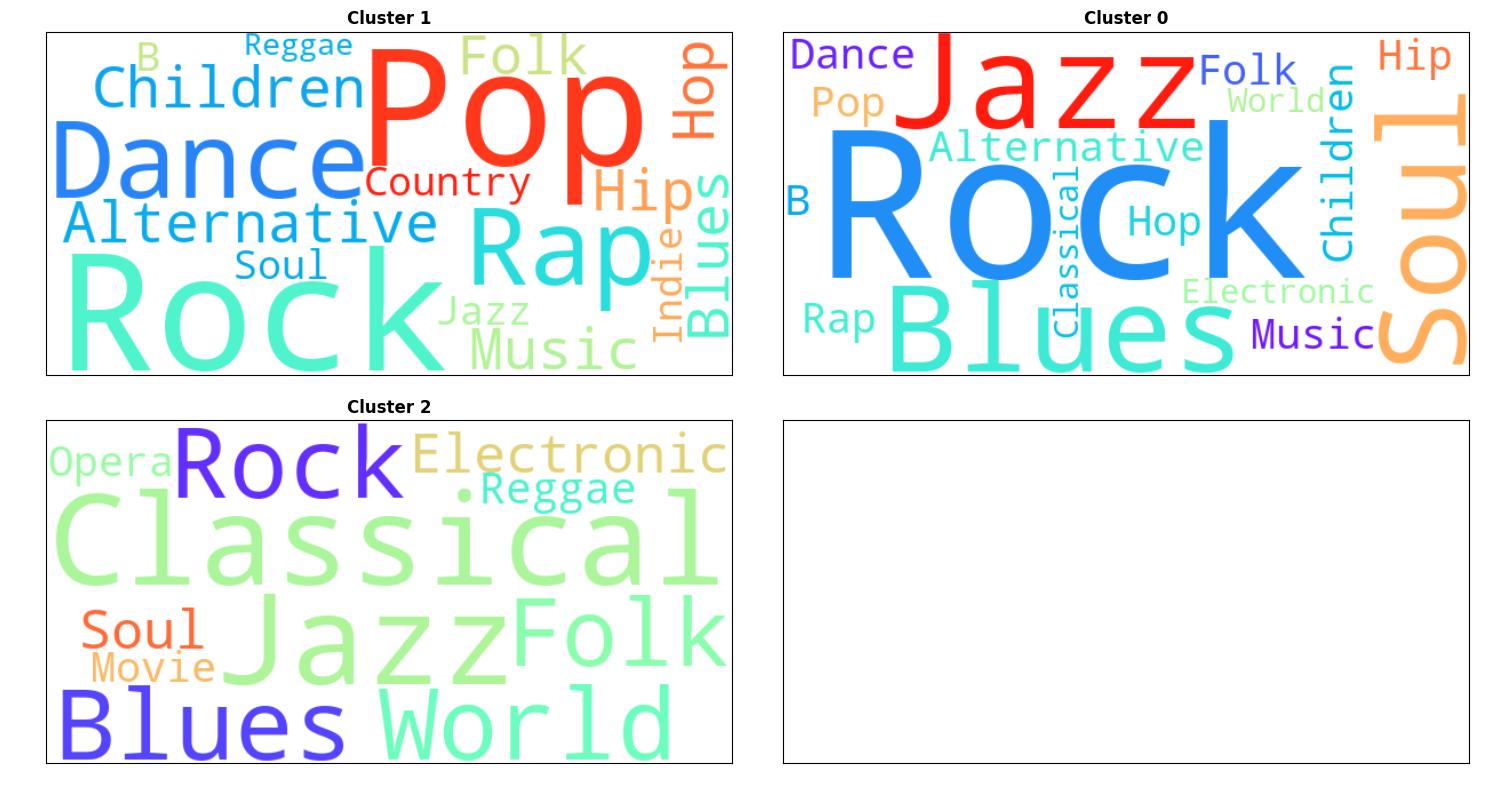

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# set axis ticks font in color white
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Create a wordcloud for each cluster
num_clusters = len(df_clust["cluster"].unique())
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_clusters - 1) // num_cols + 1  # Number of rows in the subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8), facecolor=None)

for i, cluster in enumerate(df_clust["cluster"].unique()):
    # Create a DataFrame with only the rows corresponding to the cluster
    df_cluster = df[df_clust["cluster"] == cluster]

    # Create a list of the genres in this cluster, get the most common genres
    genres = df_cluster["genre"].value_counts().index.tolist()[:15]

    # Convert the list of genres to a single string
    genres_text = " ".join(genres)

    # Create and generate a word cloud image
    wordcloud = WordCloud(width=600,height=300,background_color="white",colormap="rainbow",stopwords=STOPWORDS,min_font_size=10).generate(genres_text)
  
    # Plot the word cloud in the corresponding subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    ax.imshow(wordcloud, interpolation="bilinear")
    # hide numbers in the ticks 

    # ax.axis("off")
    ax.set_title(f"Cluster {cluster}", fontsize=12, fontweight="bold")

# Adjust the layout and spacing of subplots
plt.tight_layout();
plt.show();

# set axis ticks font in color black
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

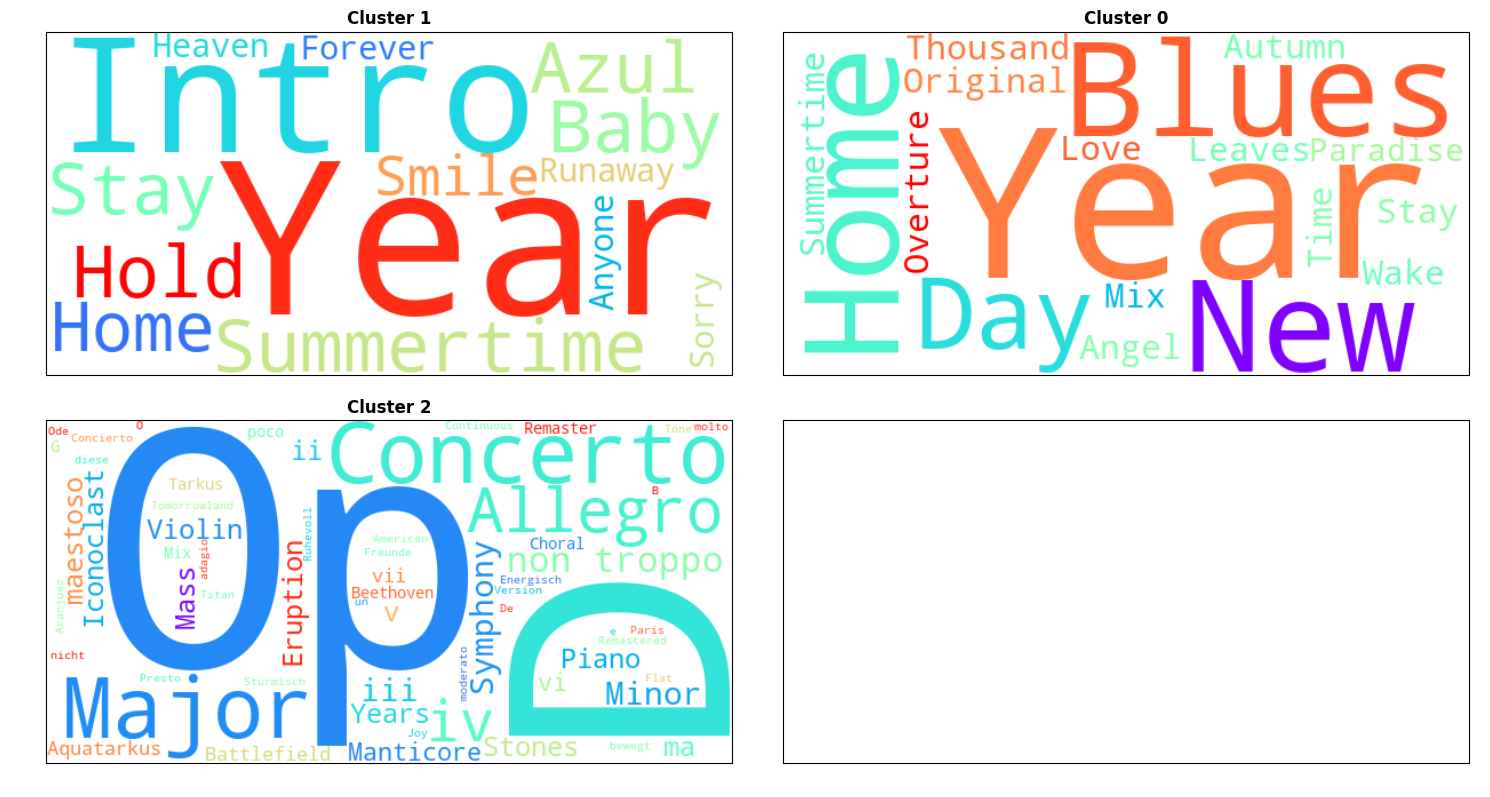

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# set axis ticks font in color white
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Create a wordcloud for each cluster
num_clusters = len(df_clust["cluster"].unique())
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_clusters - 1) // num_cols + 1  # Number of rows in the subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8), facecolor=None)

for i, cluster in enumerate(df_clust["cluster"].unique()):
    # Create a DataFrame with only the rows corresponding to the cluster
    df_cluster = df[df_clust["cluster"] == cluster]

    # Create a list of the genres in this cluster, get the most common genres
    genres = df_cluster["track_name"].value_counts().index.tolist()[:15]

    # Convert the list of genres to a single string
    genres_text = " ".join(genres)

    # Create and generate a word cloud image
    wordcloud = WordCloud(width=600,height=300,background_color="white",colormap="rainbow",stopwords=STOPWORDS,min_font_size=10).generate(genres_text)
  
    # Plot the word cloud in the corresponding subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    ax.imshow(wordcloud, interpolation="bilinear")
    # hide numbers in the ticks 

    # ax.axis("off")
    ax.set_title(f"Cluster {cluster}", fontsize=12, fontweight="bold")

# Adjust the layout and spacing of subplots
plt.tight_layout();
plt.show();

# set axis ticks font in color black
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# WELL DONE!
Now you know a tiny bit of ML.

<img src="https://github.com/AvivGelfand/DataPool/blob/main/mlops-continuous-delivery-and-automation-pipelines-in-machine-learning-1-elements-of-ml.png?raw=true" alt="image description" width="700" height="250">

If you got this far, you can achieve much more.